Original Source: https://www.kaggle.com/prashant111/mnist-deep-neural-network-with-keras

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt # plotting library
%matplotlib inline


from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Adam ,RMSprop
from keras import  backend as K


# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


Using TensorFlow backend.


In [2]:
from keras.datasets import mnist


# load dataset
(x_train, y_train),(x_test, y_test) = mnist.load_data()



# count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))



# count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


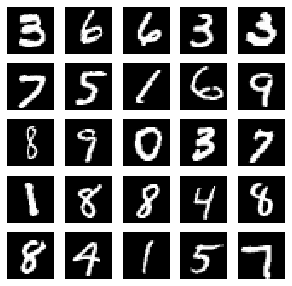

In [3]:
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


# plot the 25 mnist digits
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    
plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model

In [5]:
num_labels = len(np.unique(y_train))

In [6]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [8]:
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [9]:
# Setting parameters
batch_size = 128
hidden_units = 256
dropout = 0.45

In [10]:
model = Sequential()


model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))


model.add(Dense(hidden_units))
model.add(Activation('relu'))


model.add(Dropout(dropout))
model.add(Dense(num_labels))


model.add(Activation('softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_1 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2

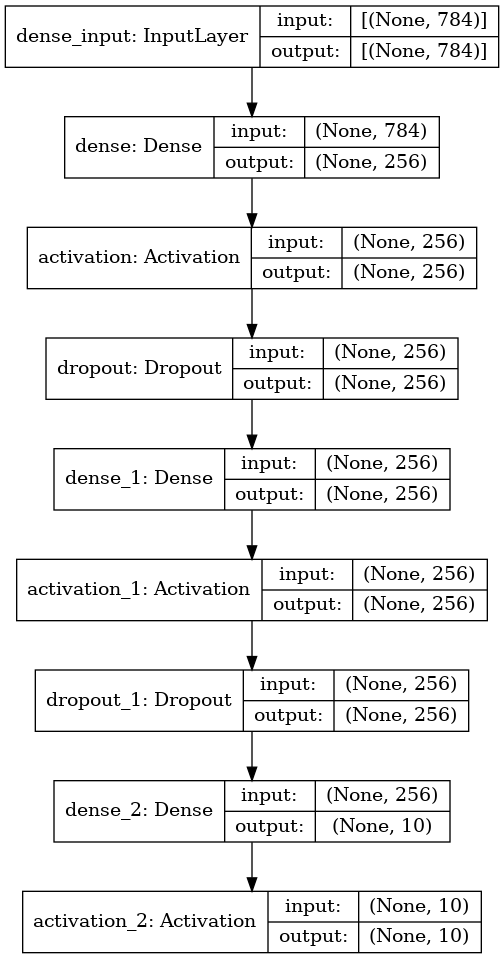

In [12]:
plot_model(model, to_file='mlp-mnist.png', show_shapes=True)


In [13]:
# Model compilation
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'],)

In [14]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Epoch 1/20
469/469 [==============================] - 3s 6ms/step - loss: 0.7320 - accuracy: 0.7689
Epoch 2/20
469/469 [==============================] - 3s 6ms/step - loss: 0.2064 - accuracy: 0.9365
Epoch 3/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1547 - accuracy: 0.9533
Epoch 4/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1277 - accuracy: 0.9599
Epoch 5/20
469/469 [==============================] - 4s 8ms/step - loss: 0.1107 - accuracy: 0.9673
Epoch 6/20
469/469 [==============================] - 3s 6ms/step - loss: 0.1057 - accuracy: 0.9678
Epoch 7/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0911 - accuracy: 0.9729
Epoch 8/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0846 - accuracy: 0.9724
Epoch 9/20
469/469 [==============================] - 3s 7ms/step - loss: 0.0789 - accuracy: 0.9754
Epoch 10/20
469/469 [==============================] - 3s 6ms/step - loss: 0.0769 - accuracy: 0.9755

KeyboardInterrupt: 

In [15]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

79/79 [==============================] - 0s 2ms/step - loss: 0.0638 - accuracy: 0.9806

Test accuracy: 98.1%


In [ ]:
in case of over fitting 
# from tensorflow.keras.regularizers import l2
# model.add(Dense(hidden_units,
#                 kernel_regularizer=l2(0.001),
#                 input_dim=input_size))